In [2]:
import numpy as np
import matplotlib.pyplot as plt
import hamhelper.plotting as hp
import math
import scipy as sp

## Question 1
Plot S(T) for these particles

1.380649e-23
[7.06282194e-20 7.06507313e-20 7.06732034e-20 7.06956356e-20
 7.07180282e-20 7.07403812e-20 7.07626948e-20 7.07849689e-20
 7.08072038e-20 7.08293995e-20]
[2.23156076e-20 2.22985404e-20 2.22814971e-20 2.22644777e-20
 2.22474820e-20 2.22305101e-20 2.22135620e-20 2.21966374e-20
 2.21797365e-20 2.21628592e-20]
9.294382697543602e-20


C:\Users\hamis\AppData\Local\Temp\ipykernel_24896\4262738225.py:6: RuntimeWarning: overflow encountered in exp
  t2 = (N*E)/((Teff/k_b) * (1 + np.exp(B*E)))
C:\Users\hamis\AppData\Local\Temp\ipykernel_24896\4262738225.py:9: RuntimeWarning: overflow encountered in exp
  return N*k_b*np.log(1 + np.exp(-B*E)) + (N*E)/((Teff/k_b) * (1 + np.exp(B*E)))


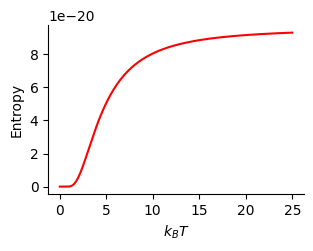

In [3]:
kB = sp.constants.k
print(kB)
def S_1(Teff, E=10, N=1e4, k_b=kB):
    B = 1/(Teff)
    t1 = N*k_b*np.log(1 + np.exp(-B*E))
    t2 = (N*E)/((Teff/k_b) * (1 + np.exp(B*E)))
    print(t1[-10:])
    print(t2[-10:])
    return N*k_b*np.log(1 + np.exp(-B*E)) + (N*E)/((Teff/k_b) * (1 + np.exp(B*E)))

x_model = np.linspace(0.01, 25, 1000)
y_model = S_1(x_model)
print(y_model[-10])

fig, ax = plt.subplots(1, 1, figsize=np.array([3.3, 2.2]))

ax.plot(x_model, y_model, 'r-')

ax.set(xlabel=r'$k_BT$', ylabel='Entropy')
hp.despine()
plt.savefig('plots/q1_s_vs_kbT.png', dpi=300)
plt.show()

# Q7
Plotting the heat capacity

C:\Users\hamis\AppData\Local\Temp\ipykernel_24896\2737964529.py:4: RuntimeWarning: overflow encountered in sinh
  C = np.sinh(omega/(2*T))**(-2)


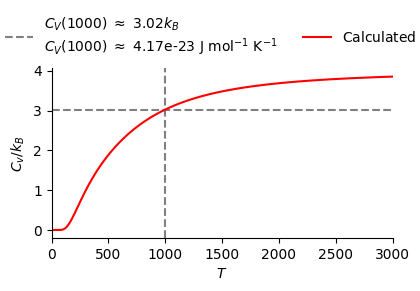

In [37]:
def term_of_Cv_divided_by_kB(T, omega):
    A = (omega**2)/(T**2)
    B = 1/4
    C = np.sinh(omega/(2*T))**(-2)
    return A*B*C

T = np.logspace(-2,3.5, 1000)
terms_of_Cv = []

omegas = [3360, 1890, 954, 954]
for omega in omegas:
    terms_of_Cv.append(term_of_Cv_divided_by_kB(T, omega))
total_Cv = np.sum(terms_of_Cv, axis=0)

# Find target cV
target_T = 1000  # K
target_Cv = total_Cv[np.argmin(np.abs(T - target_T))]

fig, ax = plt.subplots(1, 1, figsize=np.array([4.4, 2.2]))   

ax.plot(T, total_Cv, 'r-', label=r'Calculated $C_v$')
ax.axvline(1e3, ls='dashed', color='grey', zorder=1)
ax.axhline(target_Cv, ls='dashed', color='grey', zorder=1, label=r'$C_V$(' + f'{target_T:.0f}) '+r'$\approx$'+f' {target_Cv:.2f}'+r'$k_B$' +
           '\n' + r'$C_V$(' + f'{target_T:.0f}) '+r'$\approx$'+f' {target_Cv*kB:.2e}'+r' J mol$^{-1}$ K$^{-1}$')

ax.set(xlabel=r'$T$', ylabel=r'$C_v/k_B$', xlim=(0,3000))
hp.despine()
ax.legend(framealpha=0, bbox_to_anchor=(0.7, 0.99),  loc="lower center", mode="expand", ncol=2)

plt.savefig('plots/Q7_heatCapacity.png', dpi=300, bbox_inches='tight')
plt.show()


# Q8
Lets look into the Plank distribution

C:\Users\hamis\AppData\Local\Temp\ipykernel_18192\2757861515.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(np.exp(1/x) - 1)


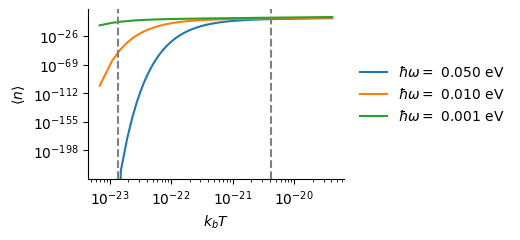

In [77]:
def plank_dist(x):
    # where x = k_b T / ( hbar omega)
    return 1/(np.exp(1/x) - 1)

# working range
T_min = 1
T_max = 300
hbar_omega_arr = [0.05, 0.01, 0.001]  # eV

# Init plot
fig, ax = plt.subplots(1, 1, figsize=[3.3, 2.2])

for hbar_omega in hbar_omega_arr:
    # convert to SI
    hbar_omega_joules = hbar_omega*1.60218e-19
    T_space = np.linspace(0.5, 3000, 10000)
    n_avg = plank_dist(T_space*(kB/(hbar_omega_joules)))
    ax.plot(T_space*kB, n_avg, label=r'$\hbar\omega =$'+f' {hbar_omega:.3f} eV')

ax.axvline(T_max*kB, color='grey', linestyle='dashed')
ax.axvline(T_min*kB, color='grey', linestyle='dashed')
ax.set(xlabel=r'$k_bT$', ylabel=r'$\langle n \rangle$',
       yscale='log', xscale='log')
l3 = plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, framealpha=0)
hp.despine()

plt.savefig('plots/q8_dist.png', dpi=300, bbox_inches='tight')
plt.show()